<font size=7> Raw Data Analysis - start 33 seconds

<font color="red">

**NOTE:** To run this notebook you need to create a codespace with 64gb of RAM

Create the spectrogram

# Set up

In [1]:
import pickle
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves, cwt_spectrogram, spectrogram_plot
from human_hip.spike_data import read_autocurated_data, plot_raster, read_phy_files


In [2]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-11-13-e-Hc110723_hckcr1_21841/acid1_start33s_stop43s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate', 'uuid', 'file'])
(936, 10000)


In [3]:
sd = read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-11-13-e-Hc110723_hckcr1_21841/elliott/hc110723_2.zip")


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

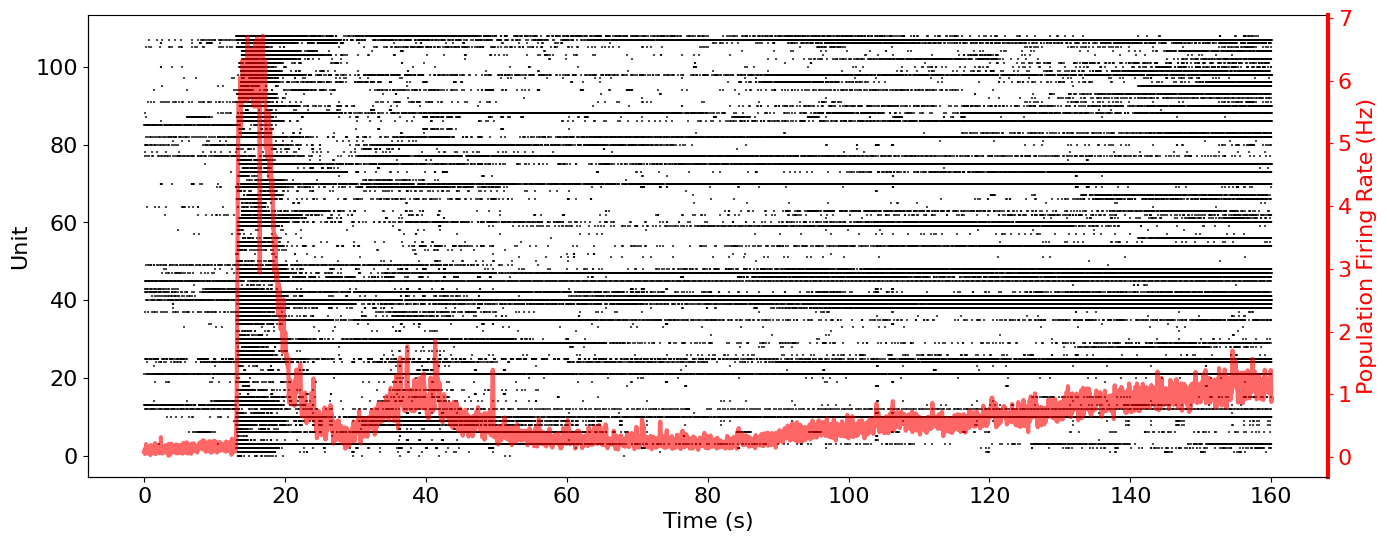

In [4]:
plot_raster( sd )

# make spectrogram

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

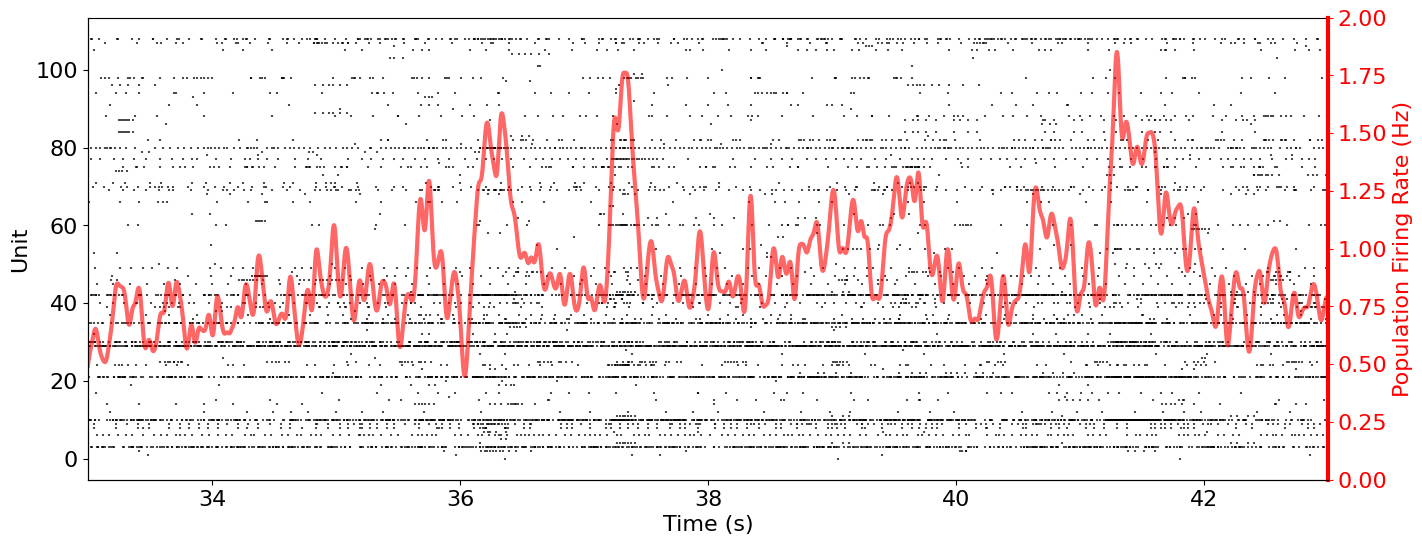

In [16]:
plot_raster(sd, xlim=(33,43), ylim=(0,2))

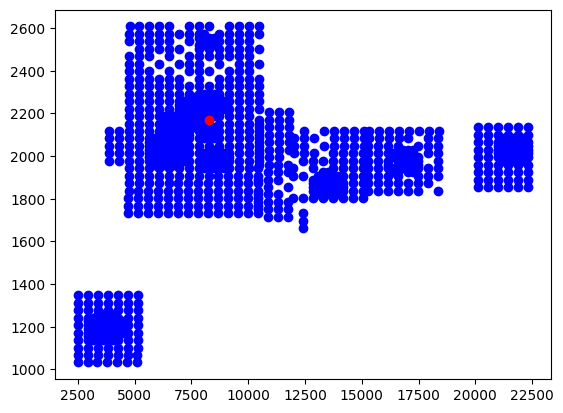

In [12]:
plt.scatter( data_raw["xy"][:,0] , data_raw["xy"][:,1], c="blue" )
plt.scatter( data_raw["xy"][5,0] , data_raw["xy"][5,1], c="red" )

In [13]:
data = get_brain_waves( data_raw["data"], data_raw["frame_rate"] )#[wave_type]  # get common brain waves


In [14]:
power, times, frequencies, coif = cwt_spectrogram( data["basic"][5,:] ,  data_raw["frame_rate"], nNotes=12)


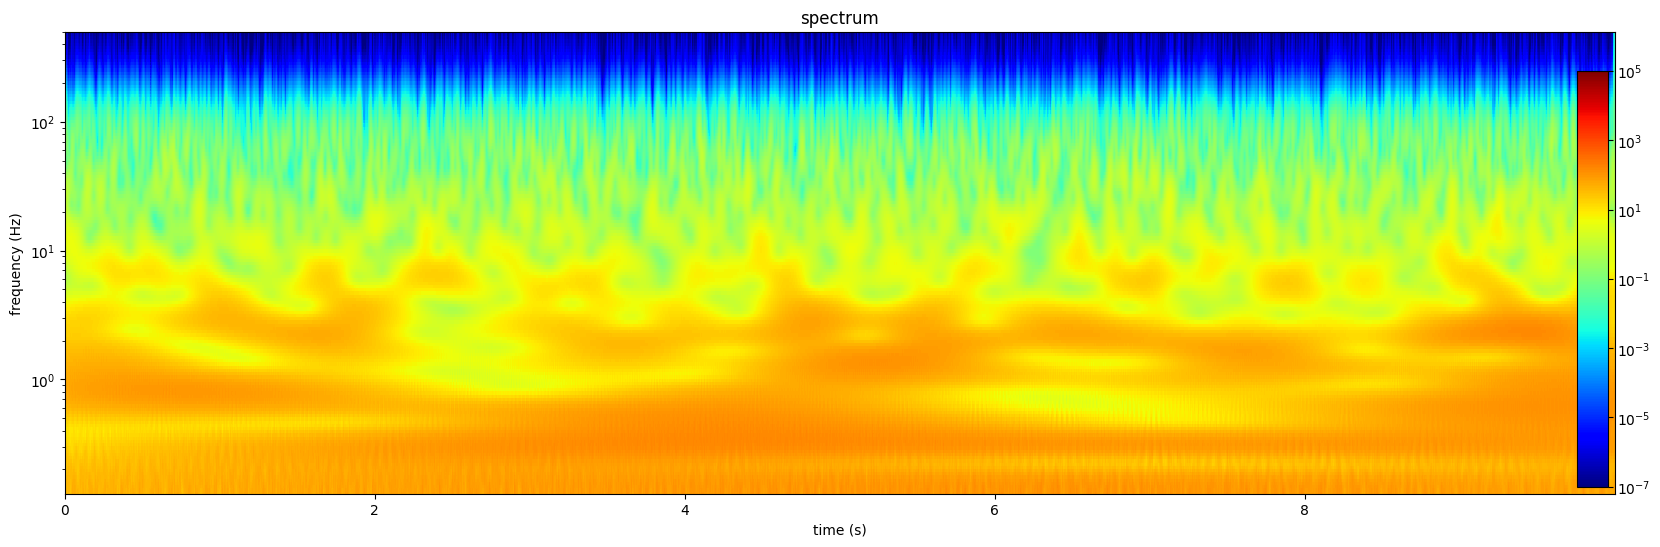

In [15]:
#print(i, channel,raw_trace.shape)
fig, axs = plt.subplots(1, 1, figsize=(20, 6))
spectrogram_plot(power, times, frequencies, coif, ax=axs)

axs.set_title(f"spectrum", fontsize=12)
#axs.set_xlim(0, len(data1_lfp)/fs ) # code causes errors
#axs.set_ylim(0, 100)
axs.set_xlabel('time (s)')
axs.set_ylabel('frequency (Hz)')
axs.set_yscale('log')
plt.show(block=False)